## MarketMetrics – Analyzing Grocery & FMCG Pricing Trends

### Title: BigBasket Entire Product List (~28K datapoints)

#### Project Overview

You are working with a growing online grocery platform that wants to understand market pricing trends and optimize product listings. You are expected to analyze product-level data across categories like vegetables, beverages, dairy, and more. Use your domain knowledge in SQL, statistics, and Python to answer real business questions and visualize trends.

### 1. Data Cleaning

In [2]:
import pandas as pd

# Load data
df = pd.read_csv('BigBasket Products.csv')

# Clean price
df['price'] = df['sale_price'].replace('[₹,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop nulls in essential columns
df = df.dropna(subset=['price', 'product', 'category'])

# Brand tagging
df['is_branded'] = df['brand'].apply(lambda x: 'Unbranded' if pd.isna(x) or str(x).strip().lower() in ['unbranded', ''] else 'Branded')

# Save cleaned version
df.to_csv('BigBasket_Cleaned.csv', index=False)

df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,price,is_branded
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,220.0,Branded
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",180.0,Branded
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",119.0,Branded
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,149.0,Branded
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,162.0,Branded


### EDA & Visualization

#### Use Python (Seaborn, Matplotlib, Plotly)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Grouped Bar Chart (Branded vs Unbranded Prices by Category)

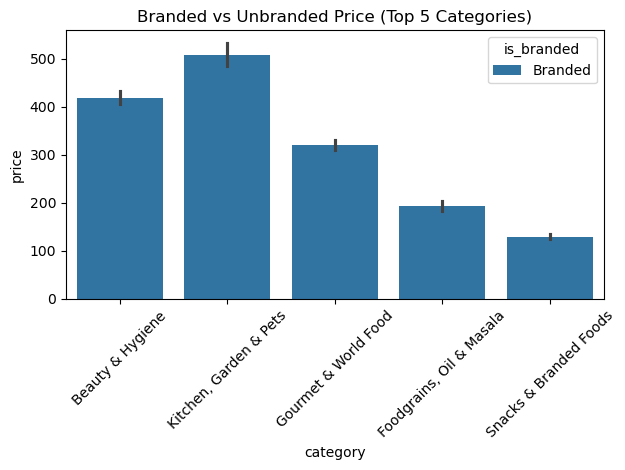

In [12]:
# Load data
df = pd.read_csv('BigBasket Products.csv')

df['price'] = df['sale_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)

df['is_branded'] = df['brand'].apply(lambda x: 'Unbranded' if pd.isna(x) else 'Branded')

top_cats = df['category'].value_counts().head(5).index
data = df[df['category'].isin(top_cats)]

sns.barplot(data=data, x='category', y='price', hue='is_branded')
plt.xticks(rotation=45)
plt.title('Branded vs Unbranded Price (Top 5 Categories)')
plt.tight_layout()
plt.show()

### 2. Box Plot (Price Spread by Category)

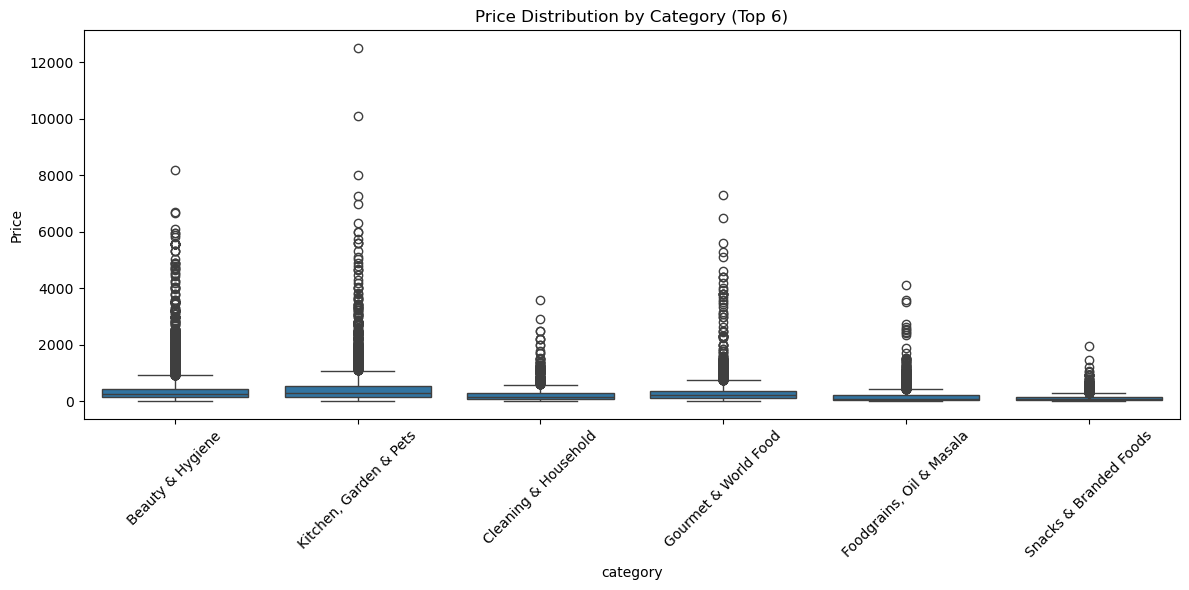

In [16]:
top6 = df['category'].value_counts().head(6).index
filtered = df[df['category'].isin(top6)]

# Boxplot without palette
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='category', y='price')
plt.title('Price Distribution by Category (Top 6)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Distribution Plot

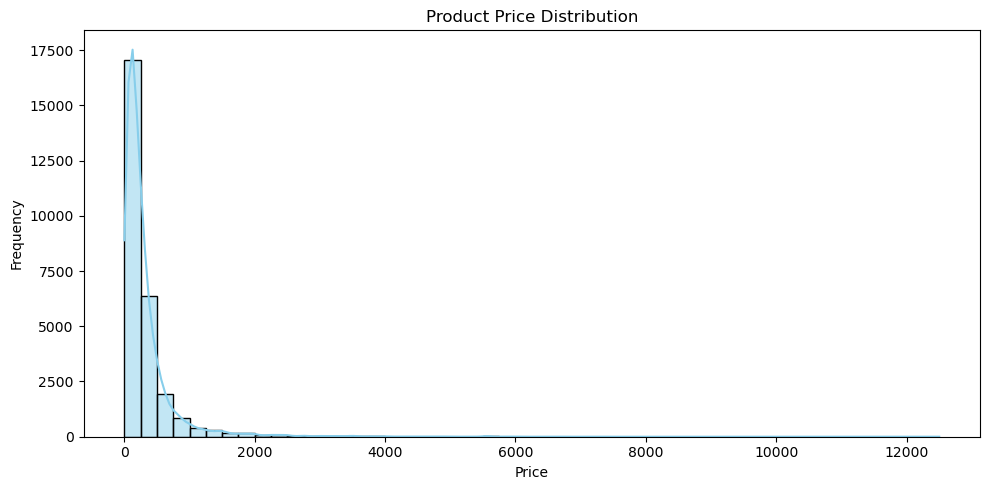

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Price vs. Category, Brand, Size

#### 1. Price vs. Category

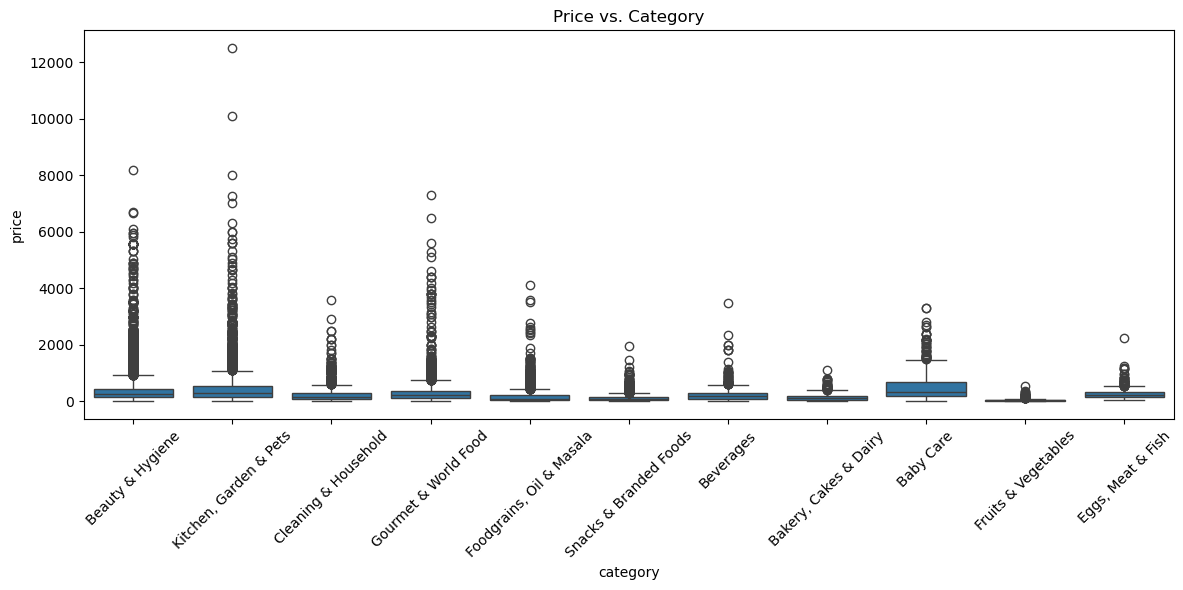

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Price vs. Category')
plt.tight_layout()
plt.show()

#### 2. Price vs. Brand (Top 10 Brands Only)

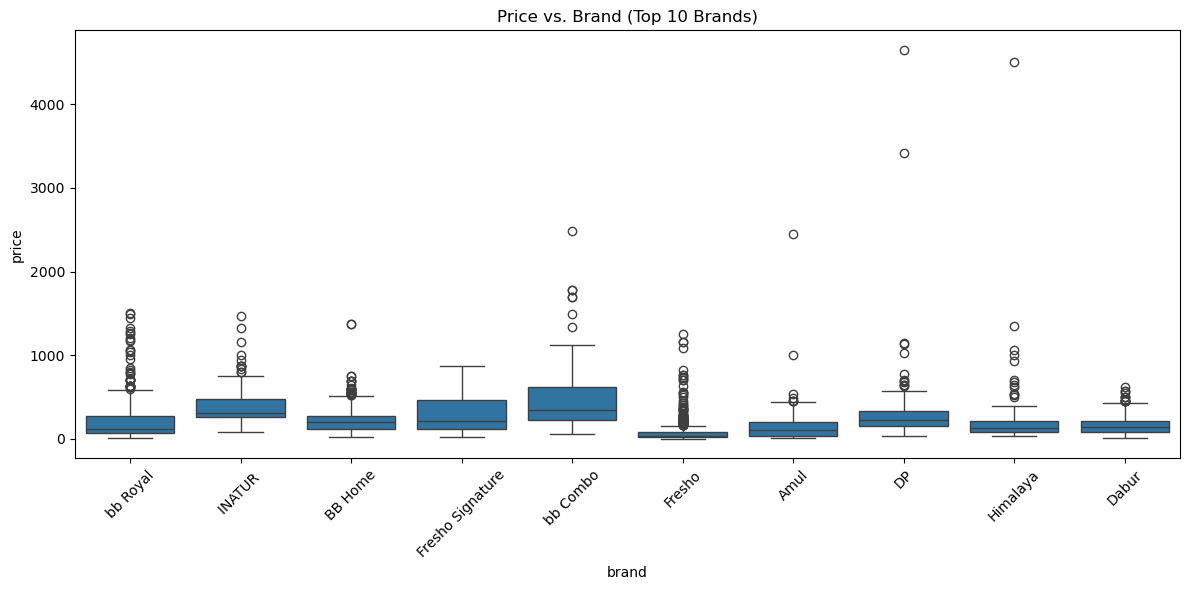

In [19]:
top_brands = df['brand'].value_counts().head(10).index
filtered = df[df['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='brand', y='price')
plt.xticks(rotation=45)
plt.title('Price vs. Brand (Top 10 Brands)')
plt.tight_layout()
plt.show()


#### 3. Price vs. Size

C:\Users\Abhay\AppData\Local\Temp\ipykernel_6192\327438851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['sale_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
C:\Users\Abhay\AppData\Local\Temp\ipykernel_6192\327438851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='coerce')
C:\Users\Abhay\AppData\Local\Temp\ipykernel_6192\327438851.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

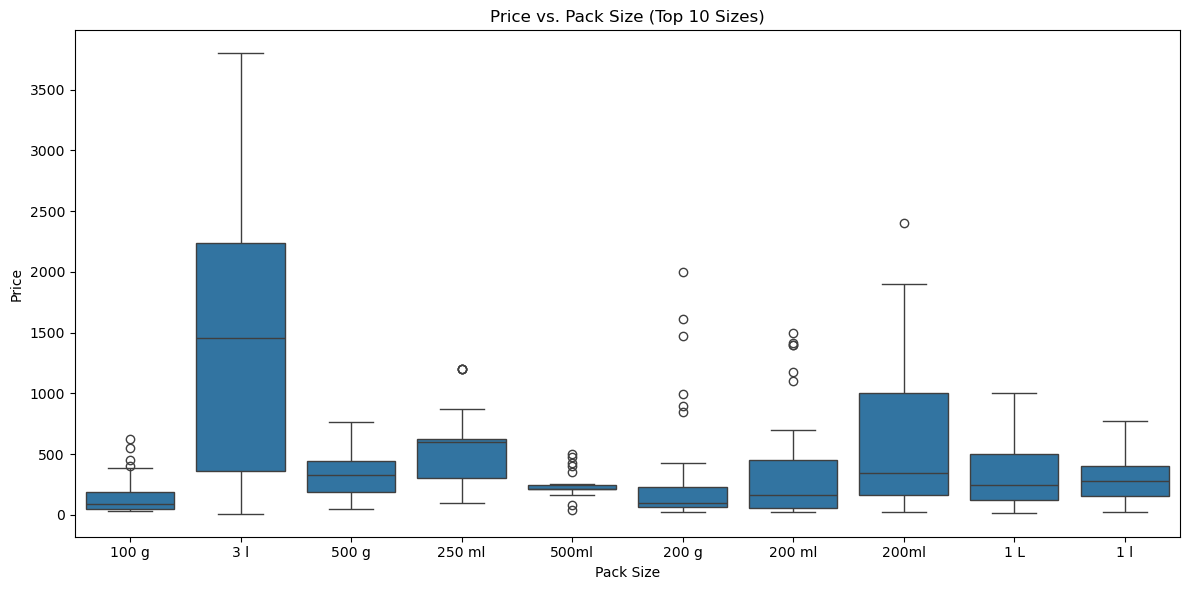

In [29]:
# Clean price column
df['price'] = df['sale_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Extract pack size from description
df['pack_size'] = df['description'].astype(str).str.extract(r'((?:\d+\.?\d*)\s?(?:ml|g|kg|l|L|pcs))')[0]

# Drop rows with missing pack size or price
df = df.dropna(subset=['price', 'pack_size'])

# Top 10 common pack sizes
top_sizes = df['pack_size'].value_counts().head(10).index
filtered = df[df['pack_size'].isin(top_sizes)]

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='pack_size', y='price')
plt.title('Price vs. Pack Size (Top 10 Sizes)')
plt.xlabel('Pack Size')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Correlation heatmaps if applicable

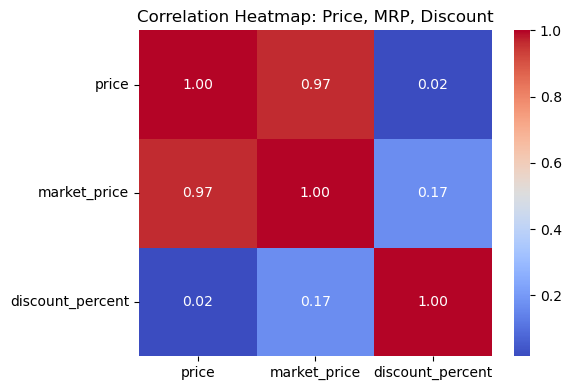

In [24]:
# Clean price columns
df['price'] = df['sale_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['market_price'] = df['market_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['market_price'] = pd.to_numeric(df['market_price'], errors='coerce')

# Add discount %
df['discount_percent'] = ((df['market_price'] - df['price']) / df['market_price']) * 100

# Drop rows with missing values
df = df.dropna(subset=['price', 'market_price', 'discount_percent'])

# Correlation matrix
corr = df[['price', 'market_price', 'discount_percent']].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price, MRP, Discount')
plt.tight_layout()
plt.show()

In [ ]:
# Load dataset
df = pd.read_csv('BigBasket_Cleaned.csv')

# Calculate discount_percent
df['discount_percent'] = ((df['market_price'] - df['price']) / df['market_price']) * 100

# Correlation matrix for relevant numeric columns
corr = df[['price', 'market_price', 'discount_percent']].corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Price, MRP, Discount')
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

df = pd.read_csv('BigBasket_Cleaned.csv')
print(df.columns.tolist())


['index', 'product', 'category', 'sub_category', 'brand', 'sale_price', 'market_price', 'type', 'rating', 'description', 'price', 'is_branded']
